 # CA5


## Arya Fayyazi 810198453

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!cp "/content/drive/MyDrive/A_Z Handwritten Data.csv" .

In [3]:
import os
from tensorflow.keras import *
from tensorflow.keras.utils import *
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import tensorboard
import keras
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')
import sklearn.utils as su
import cv2

In [4]:
df = pd.read_csv('A_Z Handwritten Data.csv')

# Phase 1 : Visualizing and preprocessing data
## In the cell below first we shuffle data. then we seperate the labels and the datas. 

In [5]:
sh_df = su.shuffle(df)

In [6]:
class_count = []

for i in range(26):
  class_count.append(sh_df["0"].value_counts()[i])

labels = sh_df["0"].reset_index(drop=True)
sh_df = sh_df.drop(['0'], axis=1)


## the number of data in train data and number of classes is shown.

In [7]:
# for i in range(len(sh_df)):
#     sh_df.iloc[i] = sh_df.iloc[i].values.resize((28,28))
print(f"number of data in dataset/train is : {len(sh_df)}")
print(f"number of classes is : {len(labels.unique())}")


number of data in dataset/train is : 372450
number of classes is : 26


## In this cell, number of each classes in train data is plotted.

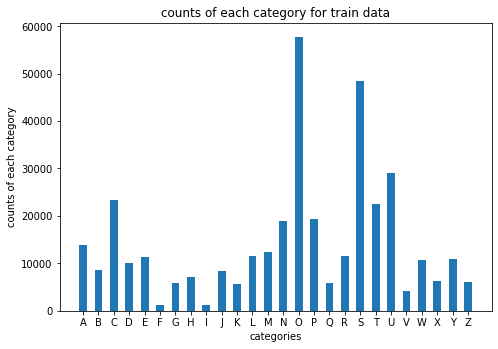

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
categories = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
ax.bar(categories , class_count , width=0.5)
# Races = categories
# df1 = pd.DataFrame({
#     'image': img_path,
#     'Race': Races
# })
plt.title("counts of each category for train data")
plt.xlabel("categories")
plt.ylabel("counts of each category")
plt.show()

## In the following cell one image from each class is shown.

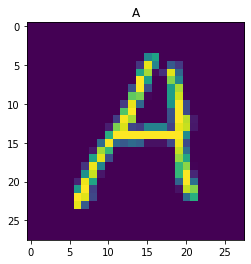

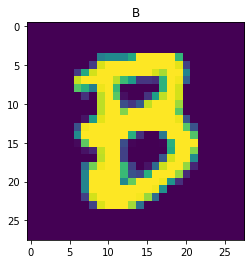

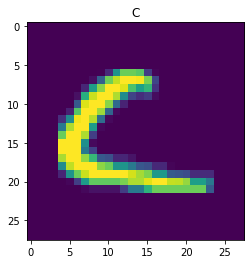

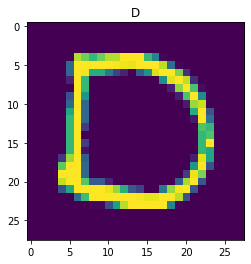

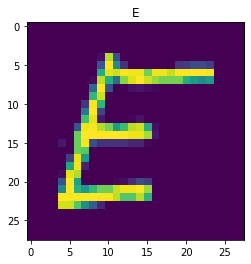

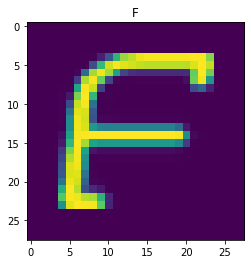

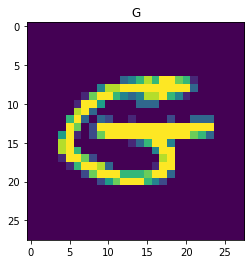

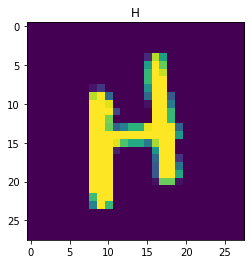

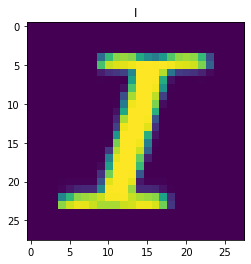

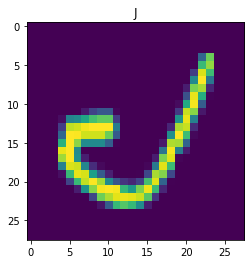

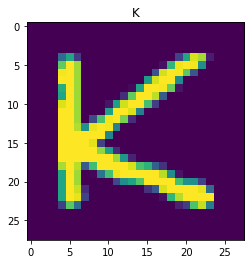

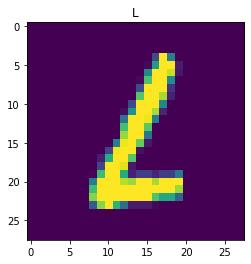

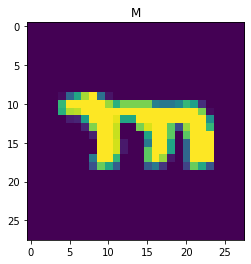

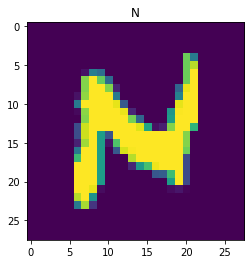

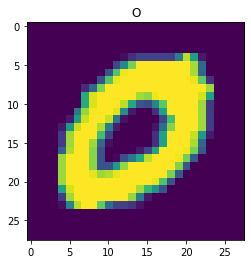

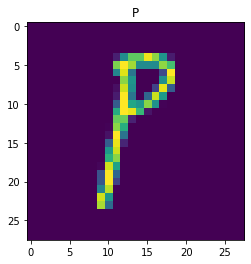

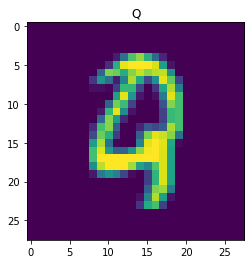

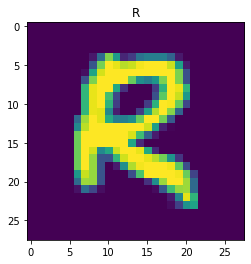

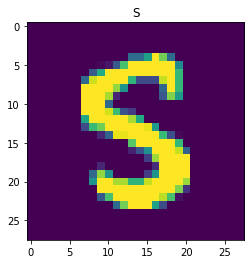

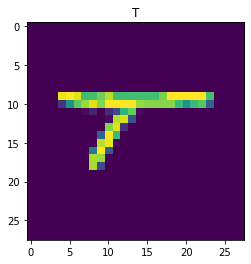

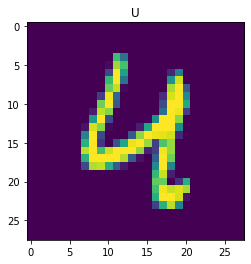

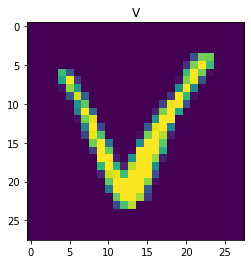

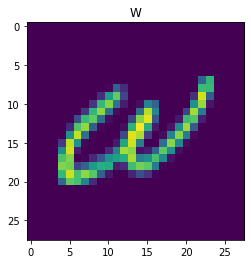

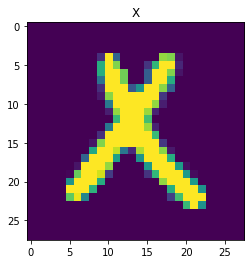

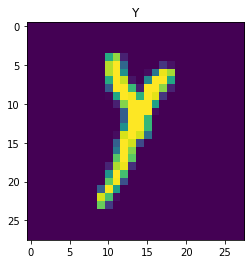

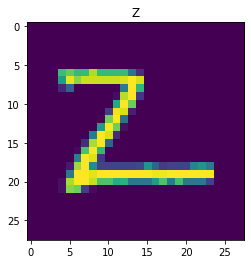

In [9]:
for i in range(26):
  for j in range(len(sh_df)):
    if labels[j] == i :
      plt.title(categories[i])
      plt.imshow(sh_df.iloc[j].values.reshape(28,28))
      plt.show()
      break

## Here we just seprate test and train data by giving train data 80% of the data and rest to test data and then do one hot encoding on labels and after that we just normalize the data by deviding them to 255
# Why should we use one hot encoding ?
## one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.
## Neural networks can tell us if an input image is which letter. Since the neural network only uses numbers, it can’t output the words “A” - “Z”. Instead, it uses one-hot encoding to represent is prediction in a semantic manner.
the explanation above is from https://medium.com and https://machinelearningmastery.com/

In [10]:
train_data = sh_df.iloc[:297960]
test_data = sh_df.iloc[297960:]



In [11]:
onehot_vectors = []
for label in labels:
    cur = [0] * 26
    cur[label] = 1
    onehot_vectors.append(cur)

train_label = onehot_vectors[:297960]
test_label = onehot_vectors[297960:]

def normalize(data_frame):
    for column in data_frame.columns:
        data_frame[column] /= 255
normalize(test_data)
normalize(train_data)

# Phase 2&3 : Designing neural network and Classification
## In the following cell the neural network with 10 epochs and 32 batch size and 2 hidden layer is designed.


In [ ]:
input = layers.Input(shape = (784,))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dense(26, activation = "softmax")(output)
model = models.Model(inputs = input, outputs = output)
model.compile(optimizer=optimizers.SGD(learning_rate =0.01), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
logs = model.fit(np.array(train_data),np.array(train_label),validation_data=(np.array(test_data),np.array(test_label)) , epochs=10,batch_size=32)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 26)                3354      
                                                                 
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
9312/9312 [==============================] -

## The accuracy and loss of each epoch is plotted in this cell and the f1 score and other metrics are calculated and printed in the end for train and validation data.

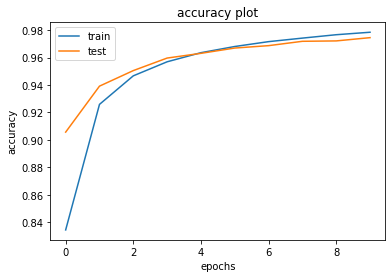

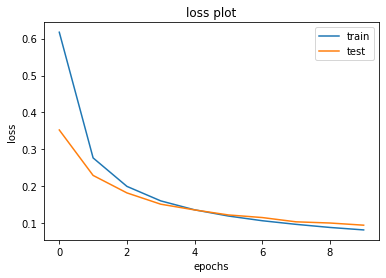

9312/9312 [==============================] - 13s 1ms/step
For train data :
              precision    recall  f1-score   support

           A       0.98      0.98      0.98     11134
           B       0.97      0.96      0.97      6920
           C       0.98      0.98      0.98     18763
           D       0.94      0.96      0.95      8146
           E       0.98      0.97      0.97      9202
           F       0.96      0.95      0.96       893
           G       0.97      0.94      0.95      4605
           H       0.96      0.95      0.96      5783
           I       0.98      0.94      0.96       876
           J       0.97      0.96      0.97      6803
           K       0.96      0.96      0.96      4507
           L       0.98      0.99      0.98      9267
           M       0.98      0.98      0.98      9847
           N       0.98      0.98      0.98     15110
           O       0.99      0.99      0.99     46247
           P       0.99      0.98      0.99     15536
      

In [ ]:
plt.plot(logs.history['accuracy'],label='train')
plt.plot(logs.history['val_accuracy'],label='test')
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(logs.history['loss'],label='train')
plt.plot(logs.history['val_loss'],label='test')
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

categories = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
predicted_class = model.predict(train_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[:297960])
print("For train data :")
print(classification_report(true_class, predicted_class,target_names=categories))

predicted_class = model.predict(test_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[297960:])
print("For validation data :")
print(classification_report(true_class, predicted_class,target_names=categories))

# section 1 : optimizer
# What is momentum and why its good to use it?
## A problem with gradient descent is that it can bounce around the search space on optimization problems that have large amounts of curvature or noisy gradients, and it can get stuck in flat spots in the search space that have no gradient.
# **Momentum** is an extension to the gradient descent optimization algorithm that allows the search to build inertia in a direction in the search space and overcome the oscillations of noisy gradients and coast across flat spots of the search space.

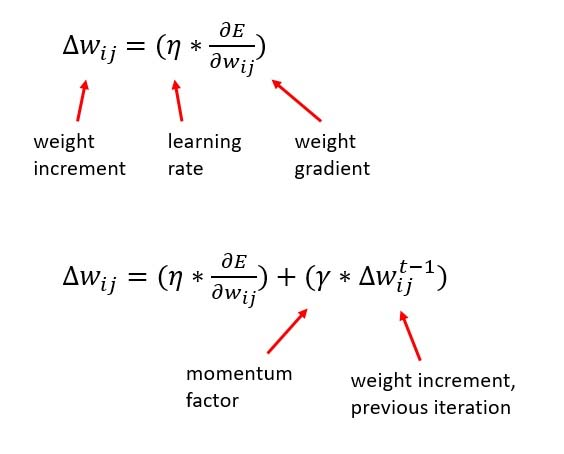
## Momentom = 0.5 :

In [ ]:
input = layers.Input(shape = (784,))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dense(26, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01,momentum=0.5), loss="categorical_crossentropy", metrics=["accuracy"])
logs = model.fit(np.array(train_data),np.array(train_label),validation_data=(np.array(test_data),np.array(test_label)) , epochs=10,batch_size=32)


Epoch 1/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.4578 - accuracy: 0.8769 - val_loss: 0.2403 - val_accuracy: 0.9362
Epoch 2/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.1900 - accuracy: 0.9486 - val_loss: 0.1576 - val_accuracy: 0.9558
Epoch 3/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.1363 - accuracy: 0.9629 - val_loss: 0.1266 - val_accuracy: 0.9647
Epoch 4/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.1093 - accuracy: 0.9705 - val_loss: 0.1086 - val_accuracy: 0.9698
Epoch 5/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.0921 - accuracy: 0.9751 - val_loss: 0.0963 - val_accuracy: 0.9735
Epoch 6/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.0794 - accuracy: 0.9784 - val_loss: 0.0883 - val_accuracy: 0.9754
Epoch 7/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.0700 - accuracy: 0.9808 - val_loss: 0.0809 - val_ac

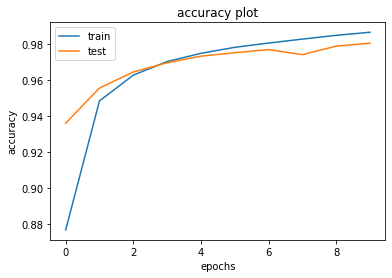

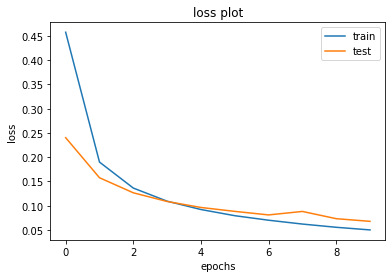

9312/9312 [==============================] - 13s 1ms/step
For train data :
              precision    recall  f1-score   support

           A       0.99      0.99      0.99     11134
           B       0.98      0.99      0.98      6920
           C       0.98      0.99      0.99     18763
           D       0.98      0.95      0.97      8146
           E       0.99      0.99      0.99      9202
           F       0.98      0.93      0.96       893
           G       0.98      0.97      0.98      4605
           H       0.98      0.98      0.98      5783
           I       0.99      0.96      0.98       876
           J       0.98      0.98      0.98      6803
           K       0.98      0.97      0.98      4507
           L       0.99      0.98      0.99      9267
           M       0.99      0.99      0.99      9847
           N       0.99      0.99      0.99     15110
           O       0.99      1.00      0.99     46247
           P       0.98      1.00      0.99     15536
      

In [ ]:
plt.plot(logs.history['accuracy'],label='train')
plt.plot(logs.history['val_accuracy'],label='test')
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(logs.history['loss'],label='train')
plt.plot(logs.history['val_loss'],label='test')
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

categories = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
predicted_class = model.predict(train_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[:297960])
print("For train data :")
print(classification_report(true_class, predicted_class,target_names=categories))

predicted_class = model.predict(test_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[297960:])
print("For validation data :")
print(classification_report(true_class, predicted_class,target_names=categories))

## Momentum = 0.9 :
## the accuracy of validation data with the model with momentum = 0.5 and momentum =0.9 is better than accuracy of validation data with the model without momentum and momentum = 0.9 is slighty better than momentum = 0.5.

In [ ]:
input = layers.Input(shape = (784,))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dense(26, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01,momentum=0.9), loss="categorical_crossentropy", metrics=["accuracy"])
logs = model.fit(np.array(train_data),np.array(train_label),validation_data=(np.array(test_data),np.array(test_label)) , epochs=10,batch_size=32)

Epoch 1/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.2486 - accuracy: 0.9300 - val_loss: 0.1219 - val_accuracy: 0.9652
Epoch 2/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.1006 - accuracy: 0.9709 - val_loss: 0.0852 - val_accuracy: 0.9752
Epoch 3/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.0724 - accuracy: 0.9787 - val_loss: 0.0740 - val_accuracy: 0.9780
Epoch 4/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.0552 - accuracy: 0.9833 - val_loss: 0.0663 - val_accuracy: 0.9808
Epoch 5/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0556 - val_accuracy: 0.9839
Epoch 6/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0518 - val_accuracy: 0.9851
Epoch 7/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0461 - val_ac

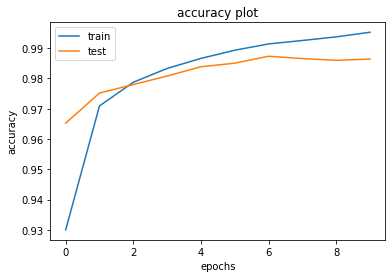

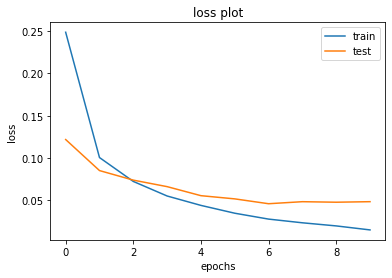

9312/9312 [==============================] - 13s 1ms/step
For train data :
              precision    recall  f1-score   support

           A       1.00      0.99      1.00     11134
           B       1.00      0.99      1.00      6920
           C       0.99      1.00      0.99     18763
           D       0.99      0.97      0.98      8146
           E       0.98      1.00      0.99      9202
           F       0.98      0.96      0.97       893
           G       1.00      0.99      0.99      4605
           H       0.99      0.99      0.99      5783
           I       0.97      1.00      0.98       876
           J       0.97      1.00      0.98      6803
           K       0.99      0.99      0.99      4507
           L       1.00      0.99      0.99      9267
           M       0.99      1.00      0.99      9847
           N       1.00      1.00      1.00     15110
           O       0.99      1.00      1.00     46247
           P       1.00      0.99      1.00     15536
      

In [ ]:
plt.plot(logs.history['accuracy'],label='train')
plt.plot(logs.history['val_accuracy'],label='test')
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(logs.history['loss'],label='train')
plt.plot(logs.history['val_loss'],label='test')
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

categories = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
predicted_class = model.predict(train_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[:297960])
print("For train data :")
print(classification_report(true_class, predicted_class,target_names=categories))

predicted_class = model.predict(test_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[297960:])
print("For validation data :")
print(classification_report(true_class, predicted_class,target_names=categories))

## Momentum = 0.98 :
## When the value of momentum set to a high value then the model may skip the minimum and miss it.
## the accuracy of validation data with the model with momentum = 0.5 and momentum =0.9 is better than accuracy of validation data with the model without momentum and momentum = 0.9 is slighty better than momentum = 0.5.when momentum is increasing in this case ,  the accuracy is keep increasing but that would be not the case for every models.

In [ ]:
input = layers.Input(shape = (784,))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dense(26, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)
model.compile(optimizer=optimizers.SGD(learning_rate=0.01,momentum=0.98), loss="categorical_crossentropy", metrics=["accuracy"])
logs = model.fit(np.array(train_data),np.array(train_label),validation_data=(np.array(test_data),np.array(test_label)) , epochs=10,batch_size=32)

Epoch 1/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.3039 - accuracy: 0.9148 - val_loss: 0.2146 - val_accuracy: 0.9427
Epoch 2/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.1829 - accuracy: 0.9512 - val_loss: 0.1849 - val_accuracy: 0.9515
Epoch 3/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.1567 - accuracy: 0.9588 - val_loss: 0.1686 - val_accuracy: 0.9586
Epoch 4/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.1493 - accuracy: 0.9620 - val_loss: 0.1454 - val_accuracy: 0.9646
Epoch 5/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.1383 - accuracy: 0.9648 - val_loss: 0.1744 - val_accuracy: 0.9601
Epoch 6/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.1396 - accuracy: 0.9658 - val_loss: 0.1755 - val_accuracy: 0.9605
Epoch 7/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.1458 - accuracy: 0.9659 - val_loss: 0.1635 - val_ac

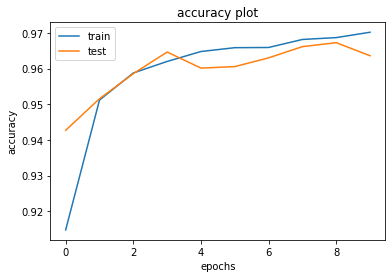

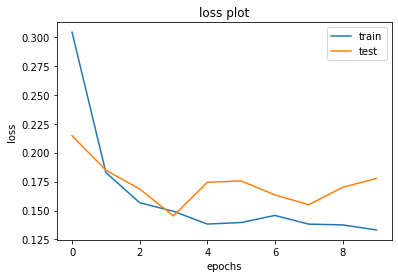

9312/9312 [==============================] - 13s 1ms/step
For train data :
              precision    recall  f1-score   support

           A       0.99      0.94      0.96     11134
           B       0.96      0.91      0.93      6920
           C       0.98      0.98      0.98     18763
           D       0.94      0.95      0.94      8146
           E       0.96      0.96      0.96      9202
           F       0.94      0.95      0.94       893
           G       0.91      0.96      0.93      4605
           H       0.86      0.95      0.90      5783
           I       0.94      0.96      0.95       876
           J       0.96      0.97      0.96      6803
           K       0.92      0.93      0.93      4507
           L       0.97      0.98      0.98      9267
           M       0.99      0.94      0.97      9847
           N       0.92      0.99      0.95     15110
           O       0.99      0.99      0.99     46247
           P       0.98      0.98      0.98     15536
      

In [ ]:
plt.plot(logs.history['accuracy'],label='train')
plt.plot(logs.history['val_accuracy'],label='test')
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(logs.history['loss'],label='train')
plt.plot(logs.history['val_loss'],label='test')
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

categories = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
predicted_class = model.predict(train_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[:297960])
print("For train data :")
print(classification_report(true_class, predicted_class,target_names=categories))

predicted_class = model.predict(test_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[297960:])
print("For validation data :")
print(classification_report(true_class, predicted_class,target_names=categories))

# Adam optimizer : 
## Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models.
## Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
## As it can bee seen the Adam optimizer is not good as sgd optimizer and has lower accuracy on validation data.

In [12]:
input = layers.Input(shape = (784,))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dense(26, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
logs = model.fit(np.array(train_data),np.array(train_label),validation_data=(np.array(test_data),np.array(test_label)) , epochs=10,batch_size=32)

Epoch 1/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.2074 - accuracy: 0.9406 - val_loss: 0.1220 - val_accuracy: 0.9646
Epoch 2/10
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0927 - accuracy: 0.9726 - val_loss: 0.0966 - val_accuracy: 0.9717
Epoch 3/10
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0687 - accuracy: 0.9796 - val_loss: 0.0810 - val_accuracy: 0.9770
Epoch 4/10
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0559 - accuracy: 0.9833 - val_loss: 0.0759 - val_accuracy: 0.9786
Epoch 5/10
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0477 - accuracy: 0.9856 - val_loss: 0.0613 - val_accuracy: 0.9827
Epoch 6/10
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.0606 - val_accuracy: 0.9833
Epoch 7/10
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0371 - accuracy: 0.9885 - val_loss: 0.0710 - val_ac

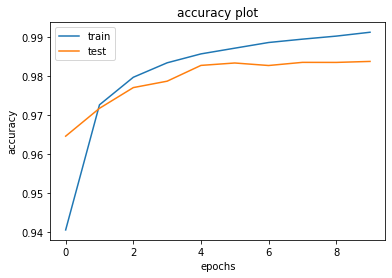

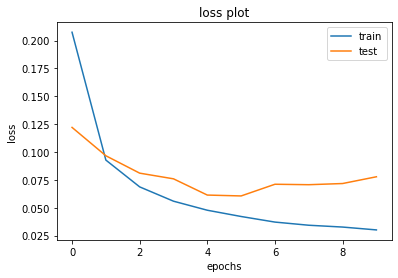

9312/9312 [==============================] - 11s 1ms/step
For train data :
              precision    recall  f1-score   support

           A       0.99      0.99      0.99     11082
           B       0.99      0.99      0.99      6923
           C       0.98      1.00      0.99     18768
           D       0.93      0.99      0.96      8132
           E       0.99      0.99      0.99      9127
           F       0.99      0.96      0.98       938
           G       0.99      0.98      0.98      4620
           H       0.99      0.98      0.99      5810
           I       0.99      0.98      0.98       901
           J       0.99      0.99      0.99      6816
           K       0.98      1.00      0.99      4452
           L       0.99      0.99      0.99      9276
           M       1.00      0.98      0.99      9862
           N       0.99      0.99      0.99     15168
           O       1.00      0.98      0.99     46235
           P       1.00      1.00      1.00     15432
      

In [13]:
plt.plot(logs.history['accuracy'],label='train')
plt.plot(logs.history['val_accuracy'],label='test')
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(logs.history['loss'],label='train')
plt.plot(logs.history['val_loss'],label='test')
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

categories = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
predicted_class = model.predict(train_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[:297960])
print("For train data :")
print(classification_report(true_class, predicted_class,target_names=categories))

predicted_class = model.predict(test_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[297960:])
print("For validation data :")
print(classification_report(true_class, predicted_class,target_names=categories))

# section 2 : epochs
## In this cell the number of epochs changes to 20 and the model train with the new amount of epochs.
## why usually train neural network with multiple epochs ?
## because we are using a limited dataset and to optimise the learning and get better accuracy . and also training on small number of epochs may leads to underfitting.
## if we have a large number of dataset and balanced classes may be using only 1 epoch is enough and there is no need to train our model on multiple epochs . but in most of the situations we have limited dataset and we should use multiple epochs for training but we should avoid overfitting . 
## As it can be seen the accuracy of validation data is starting to decrease and the loss of the validation is starting to increase at last epoch which it means overfitting happens here.
## using always lots of epoch is not good because it may cause overfitting.
## ways of preventing overfitting : 
## 1-Use Regularization.
## 2-Early Stopping
## 3-Use Dropouts.

In [14]:
input = layers.Input(shape = (784,))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dense(26, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
logs = model.fit(np.array(train_data),np.array(train_label),validation_data=(np.array(test_data),np.array(test_label)) , epochs=20,batch_size=32)

Epoch 1/20
9312/9312 [==============================] - 25s 3ms/step - loss: 0.2097 - accuracy: 0.9403 - val_loss: 0.1176 - val_accuracy: 0.9665
Epoch 2/20
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0926 - accuracy: 0.9725 - val_loss: 0.0954 - val_accuracy: 0.9720
Epoch 3/20
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0701 - accuracy: 0.9789 - val_loss: 0.0726 - val_accuracy: 0.9792
Epoch 4/20
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0559 - accuracy: 0.9829 - val_loss: 0.0742 - val_accuracy: 0.9797
Epoch 5/20
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0697 - val_accuracy: 0.9813
Epoch 6/20
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0418 - accuracy: 0.9872 - val_loss: 0.0697 - val_accuracy: 0.9820
Epoch 7/20
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 0.0679 - val_ac

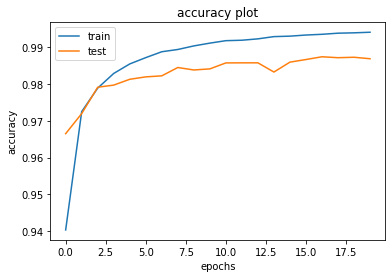

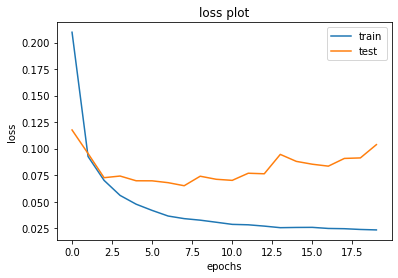

9312/9312 [==============================] - 11s 1ms/step
For train data :
              precision    recall  f1-score   support

           A       0.99      1.00      0.99     11082
           B       1.00      0.97      0.98      6923
           C       0.99      0.99      0.99     18768
           D       0.99      0.98      0.99      8132
           E       0.99      1.00      0.99      9127
           F       1.00      0.99      0.99       938
           G       0.98      0.98      0.98      4620
           H       1.00      0.98      0.99      5810
           I       0.99      0.99      0.99       901
           J       0.99      1.00      0.99      6816
           K       0.99      0.99      0.99      4452
           L       0.99      1.00      0.99      9276
           M       1.00      0.99      0.99      9862
           N       0.99      1.00      0.99     15168
           O       1.00      1.00      1.00     46235
           P       0.99      1.00      1.00     15432
      

In [15]:
plt.plot(logs.history['accuracy'],label='train')
plt.plot(logs.history['val_accuracy'],label='test')
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(logs.history['loss'],label='train')
plt.plot(logs.history['val_loss'],label='test')
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

categories = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
predicted_class = model.predict(train_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[:297960])
print("For train data :")
print(classification_report(true_class, predicted_class,target_names=categories))

predicted_class = model.predict(test_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[297960:])
print("For validation data :")
print(classification_report(true_class, predicted_class,target_names=categories))

## section 3 : Loss function
## In the cell bellow model is trained with MSE as loss function
## As it can be seen the model with MSE as loss function works worse than model with categorical_crossentropy as loss function .
## Why using MSE is a bad choice for classification ? 
## first reason is by using MSE as a loss fuction it means that we assume the data has a guassian distribution which is not true here.
## second reason is the MSE function is non-convex for binary classification. In simple terms, if a binary classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function and it may stuck in local minimum.
##  MSE is a good choice for a Cost function when we are doing Linear Regression

In [16]:
input = layers.Input(shape = (784,))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dense(26, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="mean_squared_error", metrics=["accuracy"])
logs = model.fit(np.array(train_data),np.array(train_label),validation_data=(np.array(test_data),np.array(test_label)) , epochs=10,batch_size=32)

Epoch 1/10
9312/9312 [==============================] - 25s 3ms/step - loss: 0.0041 - accuracy: 0.9280 - val_loss: 0.0027 - val_accuracy: 0.9541
Epoch 2/10
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0021 - accuracy: 0.9647 - val_loss: 0.0020 - val_accuracy: 0.9671
Epoch 3/10
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0017 - accuracy: 0.9720 - val_loss: 0.0019 - val_accuracy: 0.9694
Epoch 4/10
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0015 - accuracy: 0.9753 - val_loss: 0.0017 - val_accuracy: 0.9732
Epoch 5/10
9312/9312 [==============================] - 25s 3ms/step - loss: 0.0015 - accuracy: 0.9769 - val_loss: 0.0016 - val_accuracy: 0.9759
Epoch 6/10
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0014 - accuracy: 0.9782 - val_loss: 0.0018 - val_accuracy: 0.9741
Epoch 7/10
9312/9312 [==============================] - 24s 3ms/step - loss: 0.0014 - accuracy: 0.9788 - val_loss: 0.0018 - val_ac

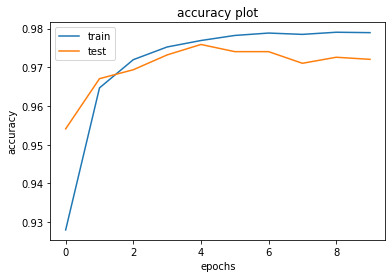

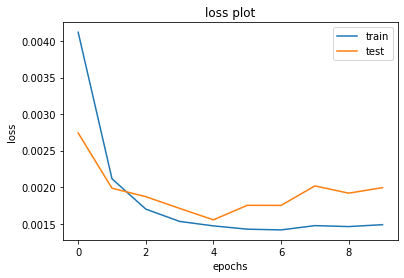

9312/9312 [==============================] - 11s 1ms/step
For train data :
              precision    recall  f1-score   support

           A       0.98      0.98      0.98     11082
           B       0.97      0.98      0.97      6923
           C       0.97      0.99      0.98     18768
           D       0.95      0.96      0.95      8132
           E       0.97      0.98      0.98      9127
           F       0.97      0.94      0.96       938
           G       0.94      0.96      0.95      4620
           H       0.95      0.96      0.95      5810
           I       0.96      0.98      0.97       901
           J       0.95      0.97      0.96      6816
           K       0.96      0.96      0.96      4452
           L       0.97      0.99      0.98      9276
           M       0.99      0.98      0.98      9862
           N       0.98      0.97      0.98     15168
           O       0.99      0.97      0.98     46235
           P       0.99      0.98      0.99     15432
      

In [17]:
plt.plot(logs.history['accuracy'],label='train')
plt.plot(logs.history['val_accuracy'],label='test')
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(logs.history['loss'],label='train')
plt.plot(logs.history['val_loss'],label='test')
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

categories = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
predicted_class = model.predict(train_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[:297960])
print("For train data :")
print(classification_report(true_class, predicted_class,target_names=categories))

predicted_class = model.predict(test_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[297960:])
print("For validation data :")
print(classification_report(true_class, predicted_class,target_names=categories))

## section 4 : Regularization
## Regularization is a technique used to reduce the likelihood of model overfitting.
##  L2 regularization tries to reduce the possibility of overfitting by keeping the values of the weights and biases small.
## we can see that the accuracy and the loss value for validation data is more stable in comparison to the model without L2 regularization.

In [18]:
input = layers.Input(shape = (784,))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(0.0001))(output)
output = layers.Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(0.0001))(output)
output = layers.Dense(26, activation = "softmax", kernel_regularizer=regularizers.l2(0.0001))(output)

model = models.Model(inputs = input, outputs = output)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
logs = model.fit(np.array(train_data),np.array(train_label),validation_data=(np.array(test_data),np.array(test_label)) , epochs=10,batch_size=32)

Epoch 1/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.2917 - accuracy: 0.9386 - val_loss: 0.2240 - val_accuracy: 0.9602
Epoch 2/10
9312/9312 [==============================] - 26s 3ms/step - loss: 0.1973 - accuracy: 0.9674 - val_loss: 0.2212 - val_accuracy: 0.9601
Epoch 3/10
9312/9312 [==============================] - 26s 3ms/step - loss: 0.1790 - accuracy: 0.9716 - val_loss: 0.1732 - val_accuracy: 0.9735
Epoch 4/10
9312/9312 [==============================] - 26s 3ms/step - loss: 0.1695 - accuracy: 0.9734 - val_loss: 0.1726 - val_accuracy: 0.9721
Epoch 5/10
9312/9312 [==============================] - 26s 3ms/step - loss: 0.1636 - accuracy: 0.9748 - val_loss: 0.1677 - val_accuracy: 0.9736
Epoch 6/10
9312/9312 [==============================] - 26s 3ms/step - loss: 0.1588 - accuracy: 0.9753 - val_loss: 0.1620 - val_accuracy: 0.9746
Epoch 7/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.1559 - accuracy: 0.9763 - val_loss: 0.1622 - val_ac

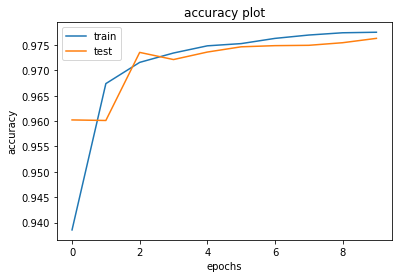

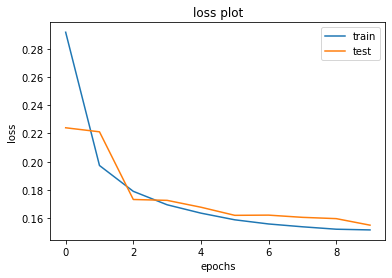

9312/9312 [==============================] - 11s 1ms/step
For train data :
              precision    recall  f1-score   support

           A       0.98      0.97      0.98     11082
           B       0.97      0.98      0.97      6923
           C       0.99      0.99      0.99     18768
           D       0.95      0.96      0.96      8132
           E       0.99      0.97      0.98      9127
           F       0.98      0.93      0.96       938
           G       0.96      0.97      0.96      4620
           H       0.92      0.98      0.94      5810
           I       0.98      0.94      0.96       901
           J       0.97      0.96      0.97      6816
           K       0.94      0.97      0.96      4452
           L       0.98      0.99      0.98      9276
           M       0.98      0.98      0.98      9862
           N       0.98      0.97      0.98     15168
           O       0.99      0.99      0.99     46235
           P       1.00      0.98      0.99     15432
      

In [19]:
plt.plot(logs.history['accuracy'],label='train')
plt.plot(logs.history['val_accuracy'],label='test')
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(logs.history['loss'],label='train')
plt.plot(logs.history['val_loss'],label='test')
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

categories = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
predicted_class = model.predict(train_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[:297960])
print("For train data :")
print(classification_report(true_class, predicted_class,target_names=categories))

predicted_class = model.predict(test_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[297960:])
print("For validation data :")
print(classification_report(true_class, predicted_class,target_names=categories))

## Dropout : 
## Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.
## As it can bee seen the accuracy of this model is a little better than accuracy of the model without any regularization.

In [13]:
input = layers.Input(shape = (784,))
output = layers.Flatten()(input)
output = layers.Dense(256, activation = "relu")(output)
output = layers.Dropout(rate=0.1)(output)
output = layers.Dense(128, activation = "relu")(output)
output = layers.Dropout(rate=0.1)(output)
output = layers.Dense(26, activation = "softmax")(output)

model = models.Model(inputs = input, outputs = output)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
logs = model.fit(np.array(train_data),np.array(train_label),validation_data=(np.array(test_data),np.array(test_label)) , epochs=10,batch_size=32)

Epoch 1/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.2477 - accuracy: 0.9289 - val_loss: 0.1120 - val_accuracy: 0.9679
Epoch 2/10
9312/9312 [==============================] - 25s 3ms/step - loss: 0.1246 - accuracy: 0.9636 - val_loss: 0.0943 - val_accuracy: 0.9731
Epoch 3/10
9312/9312 [==============================] - 25s 3ms/step - loss: 0.1022 - accuracy: 0.9700 - val_loss: 0.0811 - val_accuracy: 0.9769
Epoch 4/10
9312/9312 [==============================] - 25s 3ms/step - loss: 0.0891 - accuracy: 0.9737 - val_loss: 0.0678 - val_accuracy: 0.9807
Epoch 5/10
9312/9312 [==============================] - 25s 3ms/step - loss: 0.0808 - accuracy: 0.9756 - val_loss: 0.0720 - val_accuracy: 0.9807
Epoch 6/10
9312/9312 [==============================] - 26s 3ms/step - loss: 0.0762 - accuracy: 0.9769 - val_loss: 0.0679 - val_accuracy: 0.9826
Epoch 7/10
9312/9312 [==============================] - 26s 3ms/step - loss: 0.0715 - accuracy: 0.9785 - val_loss: 0.0688 - val_ac

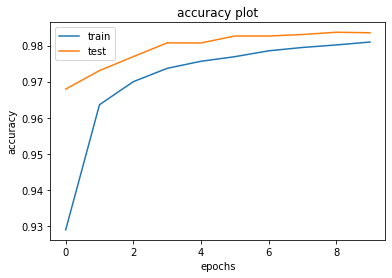

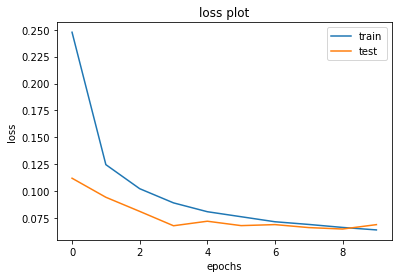

9312/9312 [==============================] - 11s 1ms/step
For train data :
              precision    recall  f1-score   support

           A       0.99      1.00      0.99     11099
           B       0.99      0.98      0.99      7003
           C       0.99      0.99      0.99     18675
           D       0.99      0.96      0.97      8098
           E       1.00      0.99      0.99      9159
           F       0.97      0.99      0.98       916
           G       0.98      0.99      0.98      4607
           H       0.99      0.98      0.99      5847
           I       0.99      0.98      0.98       878
           J       0.97      0.99      0.98      6861
           K       0.98      0.99      0.99      4450
           L       0.99      0.99      0.99      9275
           M       1.00      0.99      0.99      9865
           N       0.99      0.99      0.99     15217
           O       0.99      1.00      0.99     46162
           P       1.00      0.99      0.99     15461
      

In [14]:
plt.plot(logs.history['accuracy'],label='train')
plt.plot(logs.history['val_accuracy'],label='test')
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(logs.history['loss'],label='train')
plt.plot(logs.history['val_loss'],label='test')
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

categories = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
predicted_class = model.predict(train_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[:297960])
print("For train data :")
print(classification_report(true_class, predicted_class,target_names=categories))

predicted_class = model.predict(test_data, verbose = 1)
predicted_class = np.argmax(predicted_class, axis = 1)
true_class = np.array(labels[297960:])
print("For validation data :")
print(classification_report(true_class, predicted_class,target_names=categories))